<a href="https://colab.research.google.com/github/Resia05/supervised-learning/blob/main/%D0%9A%D0%BE%D0%BF%D1%96%D1%8F_%D0%B7%D0%B0%D0%BF%D0%B8%D1%81%D0%BD%D0%B8%D0%BA%D0%B0_%22HW_2_5_%D0%9B%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F_%D0%B2%D1%96%D0%B4_%D0%B1%D0%B0%D0%B3%D0%B0%D1%82%D1%8C%D0%BE%D1%85_%D0%B7%D0%BC%D1%96%D0%BD%D0%BD%D0%B8%D1%85_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import StandardScaler


# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [3]:
car_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Домашні завдання/cars.csv')
car_df.head(5)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [4]:
car_df=car_df.drop(columns=['Car_ID'],axis=1)

**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [5]:
car_df.shape

(100, 12)

In [6]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand              100 non-null    object
 1   Model              100 non-null    object
 2   Year               100 non-null    int64 
 3   Kilometers_Driven  100 non-null    int64 
 4   Fuel_Type          100 non-null    object
 5   Transmission       100 non-null    object
 6   Owner_Type         100 non-null    object
 7   Mileage            100 non-null    int64 
 8   Engine             100 non-null    int64 
 9   Power              100 non-null    int64 
 10  Seats              100 non-null    int64 
 11  Price              100 non-null    int64 
dtypes: int64(7), object(5)
memory usage: 9.5+ KB


In [7]:
car_df.Brand.unique()

array(['Toyota', 'Honda', 'Ford', 'Maruti', 'Hyundai', 'Tata', 'Mahindra',
       'Volkswagen', 'Audi', 'BMW', 'Mercedes'], dtype=object)

In [8]:
car_df.Model.unique()

array(['Corolla', 'Civic', 'Mustang', 'Swift', 'Sonata', 'Nexon',
       'Scorpio', 'Polo', 'A4', 'X1', 'C-Class', 'Endeavour', 'Creta',
       'Harrier', 'Ertiga', 'City', 'Tiguan', 'Q3', '5 Series', 'GLC',
       'Innova', 'Figo', 'Verna', 'Altroz', 'Thar', 'Passat', 'A6', 'X3',
       'E-Class', 'Fortuner', 'Aspire', 'Elantra', 'Safari', 'Vitara',
       'WR-V', 'Ameo', 'A3', '7 Series', 'GLE', 'Yaris', 'Ranger',
       'Santro', 'Tigor', 'S-Cross', 'BR-V', 'T-Roc', 'Q7', 'X5', 'GLA',
       'Camry', 'Venue', 'Tiago', 'XUV300', 'Vento', 'A5', '3 Series',
       'Innova Crysta', 'EcoSport'], dtype=object)

In [9]:
car_df.Fuel_Type.unique()

array(['Petrol', 'Diesel'], dtype=object)

In [10]:
car_df.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [11]:
car_df.Owner_Type.unique()

array(['First', 'Second', 'Third'], dtype=object)

In [12]:
car_df.select_dtypes(exclude=['object'])

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0,2018,50000,15,1498,108,5,800000
1,2019,40000,17,1597,140,5,1000000
2,2017,20000,10,4951,395,4,2500000
3,2020,30000,23,1248,74,5,600000
4,2016,60000,18,1999,194,5,850000
...,...,...,...,...,...,...,...
95,2019,22000,16,1950,191,5,2900000
96,2017,38000,13,2755,171,7,1400000
97,2018,26000,18,1497,121,5,750000
98,2019,24000,17,1497,113,5,850000


In [13]:
car_df.isnull().sum()

Brand                0
Model                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [14]:
car_df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,2018.39000,28150.000000,17.210000,1855.230000,158.130000,5.230000,1.574000e+06
std,1.17116,9121.375716,3.309902,631.311475,76.968137,0.750151,1.000265e+06
min,2016.00000,10000.000000,10.000000,999.000000,68.000000,4.000000,4.500000e+05
25%,2017.75000,22000.000000,15.000000,1462.000000,103.000000,5.000000,7.000000e+05
50%,2018.00000,27000.000000,17.000000,1774.000000,148.000000,5.000000,1.300000e+06
75%,2019.00000,32000.000000,19.000000,2143.000000,187.000000,5.000000,2.500000e+06
max,2021.00000,60000.000000,25.000000,4951.000000,396.000000,7.000000,4.000000e+06


**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [15]:
car_df

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Mercedes,C-Class,2019,22000,Diesel,Automatic,First,16,1950,191,5,2900000
96,Toyota,Innova Crysta,2017,38000,Diesel,Manual,Second,13,2755,171,7,1400000
97,Ford,EcoSport,2018,26000,Petrol,Manual,Third,18,1497,121,5,750000
98,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497,113,5,850000


In [16]:
# inputs, targets = car_df[['Kilometers_Driven', 'Mileage', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type']], car_df['Price']
inputs, targets = car_df[['Kilometers_Driven', 'Mileage', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand']], car_df['Price']

y = targets
X = inputs

# Розділяємо на тренувальний і тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Виведемо розміри отриманих наборів даних
print("Розмір X_train:", X_train.shape)
print("Розмір X_test:", X_test.shape)
print("Розмір y_train:", y_train.shape)
print("Розмір y_test:", y_test.shape)

Розмір X_train: (80, 7)
Розмір X_test: (20, 7)
Розмір y_train: (80,)
Розмір y_test: (20,)


**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

<Axes: xlabel='Fuel_Type', ylabel='Price'>

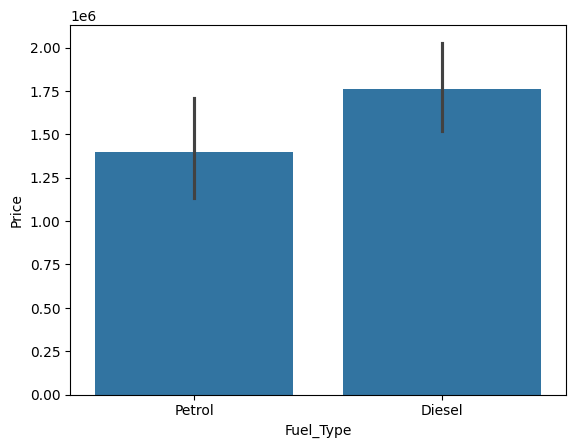

In [17]:
sns.barplot(data=car_df, x='Fuel_Type', y='Price')

<Axes: xlabel='Transmission', ylabel='Price'>

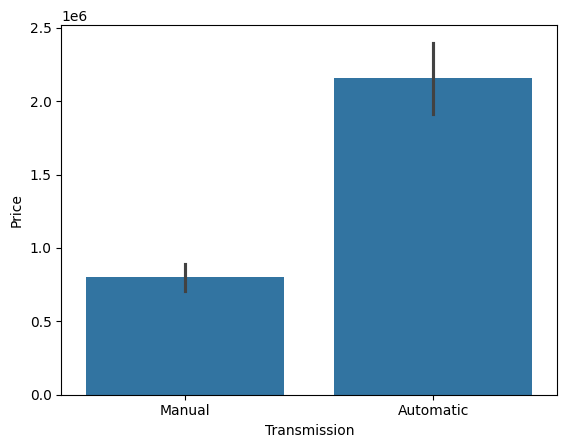

In [18]:
sns.barplot(data=car_df, x='Transmission', y='Price')

In [19]:
Fuel_Type_codes = {'Petrol': 0, 'Diesel': 1}

In [20]:
Transmission_codes = {'Manual': 0, 'Automatic': 1}

In [21]:
car_df['Fuel_Type_codes'] = car_df.Fuel_Type.map(Fuel_Type_codes)

In [22]:
car_df['Transmission_codes'] = car_df.Transmission.map(Transmission_codes)

In [23]:
car_df.Price.corr(car_df.Fuel_Type_codes)

0.18096358734385454

In [24]:
car_df.Price.corr(car_df.Transmission_codes)

0.6764835122739136

In [25]:
def train_model_show_rmse(inputs, targets):
  model = LinearRegression().fit(inputs, targets)
  predictions = model.predict(inputs)
  loss = mean_squared_error(targets, predictions, squared=False)
  print('Loss:', loss)
  return model

In [26]:
# inputs, targets = car_df[['Kilometers_Driven', 'Mileage', 'Transmission_codes', 'Fuel_Type_codes' ]], car_df['Price']
inputs, targets = car_df[['Kilometers_Driven', 'Mileage', 'Year', 'Transmission_codes', 'Fuel_Type_codes']], car_df['Price']

train_model_show_rmse(inputs, targets)

Loss: 560692.9595315923


LinearRegression()

In [27]:
print(X_train.columns)

Index(['Kilometers_Driven', 'Mileage', 'Year', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Brand'],
      dtype='object')


На цьому моемнті запуталась. Я замінила дані в основному наборі даних, а не в тренувальних і тестових. Тому тіж самі дії хочу зробити і на розділених наборах даних, так як у нас завдання в такій послідовності. Але, сумніваюсь, чому просто не зробити цю дію до розбиття на дата сети?

In [28]:
def encode_columns(df):
    # Визначаємо коди для заміни
    Fuel_Type_codes = {'Petrol': 0, 'Diesel': 1}
    Transmission_codes = {'Manual': 0, 'Automatic': 1}

    # Застосовуємо мапінг до відповідних колонок
    df['Fuel_Type_codes'] = df['Fuel_Type'].map(Fuel_Type_codes)
    df['Transmission_codes'] = df['Transmission'].map(Transmission_codes)

    return df

In [29]:
X_train = encode_columns(X_train)

In [30]:
X_test = encode_columns(X_test)

In [31]:
def one_hot_encode(df, column):
    # Ініціалізуємо OneHotEncoder
    enc = OneHotEncoder(sparse=False)

    # Навчаємо Encoder на вказаній колонці
    enc.fit(df[[column]])

    # Виконуємо One-Hot Encoding
    one_hot = enc.transform(df[[column]])

    # Додаємо закодовані колонки до DataFrame
    one_hot_df = pd.DataFrame(one_hot, columns=enc.get_feature_names_out([column]))
    df = pd.concat([df.reset_index(drop=True), one_hot_df], axis=1)

    return df

In [32]:
X_train = one_hot_encode(X_train, 'Brand')
X_test = one_hot_encode(X_test, 'Brand')


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [33]:
ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [34]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Kilometers_Driven,Mileage,Year,Fuel_Type,Transmission,Owner_Type,Brand,Fuel_Type_codes,Transmission_codes,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes
0,22000,18,2019,Petrol,Automatic,Second,Volkswagen,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,28000,17,2018,Diesel,Automatic,First,Audi,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,28000,15,2018,Petrol,Automatic,First,Audi,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,32000,18,2017,Petrol,Manual,Second,Volkswagen,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,26000,12,2017,Petrol,Automatic,Second,Mercedes,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Kilometers_Driven,Mileage,Year,Fuel_Type,Transmission,Owner_Type,Brand,Fuel_Type_codes,Transmission_codes,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes
0,38000,15,2016,Petrol,Automatic,Second,Audi,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,26000,20,2019,Petrol,Manual,Third,Hyundai,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,32000,18,2017,Petrol,Manual,Second,Volkswagen,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,18000,19,2020,Petrol,Manual,First,Maruti,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,26000,20,2019,Petrol,Manual,Third,Ford,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Kilometers_Driven   80 non-null     int64  
 1   Mileage             80 non-null     int64  
 2   Year                80 non-null     int64  
 3   Fuel_Type           80 non-null     object 
 4   Transmission        80 non-null     object 
 5   Owner_Type          80 non-null     object 
 6   Brand               80 non-null     object 
 7   Fuel_Type_codes     80 non-null     int64  
 8   Transmission_codes  80 non-null     int64  
 9   Brand_Audi          80 non-null     float64
 10  Brand_BMW           80 non-null     float64
 11  Brand_Ford          80 non-null     float64
 12  Brand_Honda         80 non-null     float64
 13  Brand_Hyundai       80 non-null     float64
 14  Brand_Mahindra      80 non-null     float64
 15  Brand_Maruti        80 non-null     float64
 16  Brand_Merc

In [36]:
X_train = X_train.select_dtypes(include=['float64', 'int64'])
X_train

,Kilometers_Driven,Mileage,Year,Fuel_Type_codes,Transmission_codes,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes
0,22000,18,2019,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,28000,17,2018,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,28000,15,2018,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,32000,18,2017,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,26000,12,2017,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,30000,23,2020,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
76,20000,10,2017,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,45000,15,2018,1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
78,22000,18,2019,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [37]:
y_train

83    1600000
55    2600000
26    3200000
54     650000
19    2500000
       ...   
3      600000
2     2500000
6      900000
27    2800000
75    3500000
Name: Price, Length: 80, dtype: int64

Чи вірно в наступному коді співставляється ціна до основних даних?

In [38]:
train_df = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)

train_df

,Kilometers_Driven,Mileage,Year,Fuel_Type_codes,Transmission_codes,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes,Price
0,22000,18,2019,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1600000
1,28000,17,2018,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2600000
2,28000,15,2018,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3200000
3,32000,18,2017,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,650000
4,26000,12,2017,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,30000,23,2020,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,600000
76,20000,10,2017,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2500000
77,45000,15,2018,1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,900000
78,22000,18,2019,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2800000


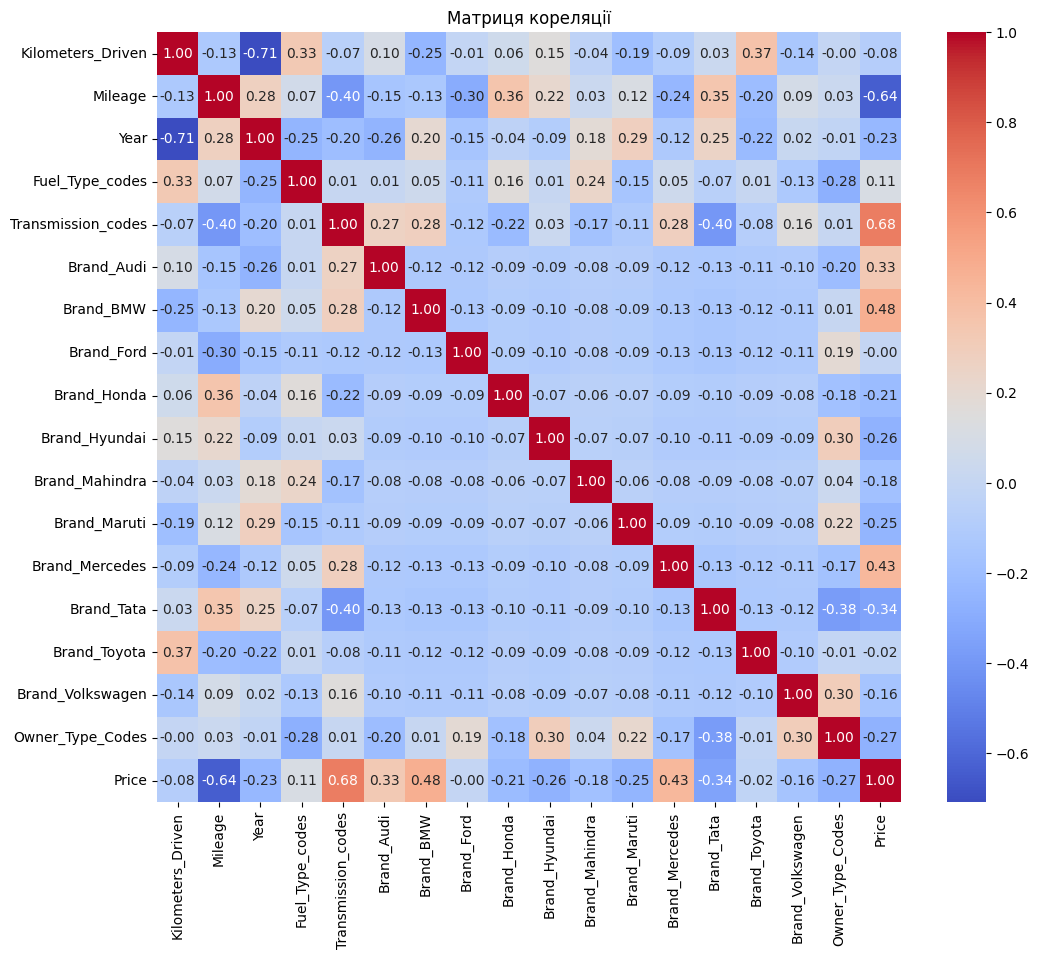

In [39]:
corr_matrix = train_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матриця кореляції')
plt.show()


Кореляція > 0,5 є між парами:
Kilometers_Driven -  Year
Mileage - Price
Transmission_codes - Price
Нас цікавлять показники, які корелюються з ціною


In [40]:
X_test = X_test.select_dtypes(include=['float64', 'int64'])
X_test

,Kilometers_Driven,Mileage,Year,Fuel_Type_codes,Transmission_codes,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes
0,38000,15,2016,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,26000,20,2019,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,32000,18,2017,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,18000,19,2020,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,26000,20,2019,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
5,32000,22,2017,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,32000,17,2018,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
7,42000,25,2017,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,15000,18,2020,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
9,24000,17,2019,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [41]:
test_df = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)

test_df

,Kilometers_Driven,Mileage,Year,Fuel_Type_codes,Transmission_codes,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes,Price
0,38000,15,2016,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1900000
1,26000,20,2019,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,450000
2,32000,18,2017,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,650000
3,18000,19,2020,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,850000
4,26000,20,2019,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,600000
5,32000,22,2017,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,800000
6,32000,17,2018,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,550000
7,42000,25,2017,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,650000
8,15000,18,2020,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,550000
9,24000,17,2019,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,850000


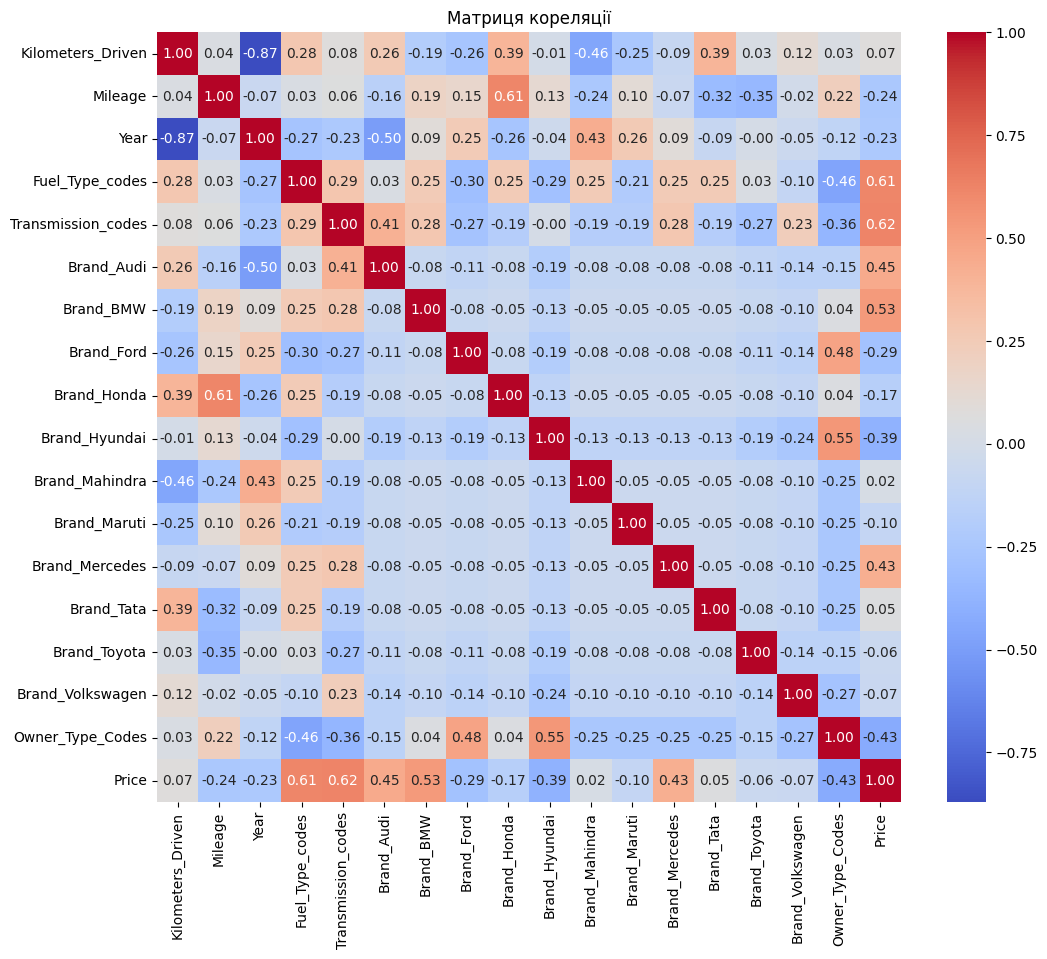

In [42]:
corr_matrix = test_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матриця кореляції')
plt.show()

На тестових даних ми бачимо кореляцію з ціною по наступним показникам:
Fuel_Type_codes
Transmission_codes
Brand_BMW

В обох наборах даних висока кореляція з Transmission_codes

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

Root Mean Squared Error для тренувального набору: 315643.23659239913
Root Mean Squared Error для тестового набору: 330320.8564647354


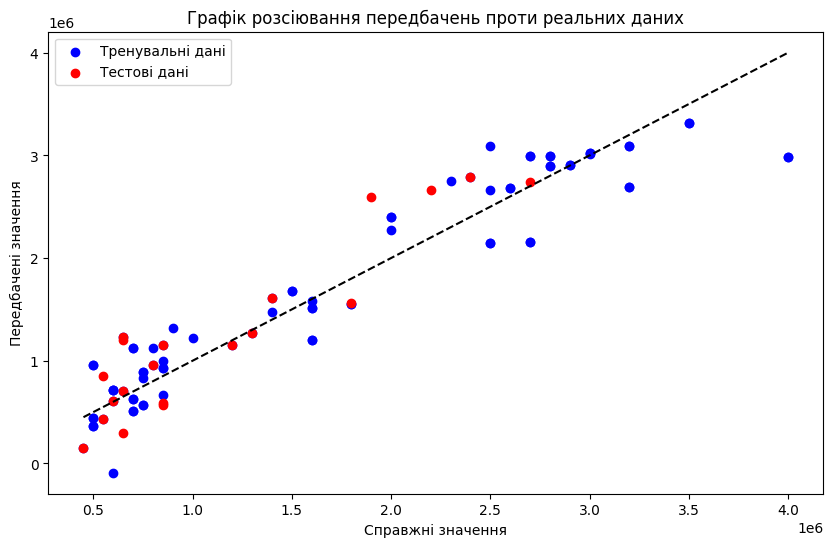

In [43]:
# Ініціалізація та навчання моделі
linear_reg = LinearRegression()
linear_reg.fit(X_train.select_dtypes(include=['float64', 'int64']), y_train)

# Передбачення на тренувальному наборі
y_train_pred = linear_reg.predict(X_train.select_dtypes(include=['float64', 'int64']))
# Передбачення на тестовому наборі
y_test_pred = linear_reg.predict(X_test.select_dtypes(include=['float64', 'int64']))

# Визначення root mean squared error
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Root Mean Squared Error для тренувального набору:", train_rmse)
print("Root Mean Squared Error для тестового набору:", test_rmse)

# Побудова графіку розсіювання передбачень проти справжніх значень цільової змінної
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Тренувальні дані')
plt.scatter(y_test, y_test_pred, color='red', label='Тестові дані')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='black', linestyle='--')
plt.xlabel('Справжні значення')
plt.ylabel('Передбачені значення')
plt.title('Графік розсіювання передбачень проти реальних даних')
plt.legend()
plt.show()


Число втрат (похибка) дуже велика.
Графік сильно розсіяний, але точки близько до лінії.


**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [44]:
# Ініціалізуємо та навчаємо масштабувальник на тренувальних даних
scaler = StandardScaler()
scaler.fit(X_train)

# Масштабуємо незалежні змінні тренувального і тестового наборів
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Тренуємо модель на відмасштабованих даних
linear_reg_scaled = LinearRegression()
linear_reg_scaled.fit(X_train_scaled, y_train)

# Отримуємо коефіцієнти моделі
coefficients = linear_reg_scaled.coef_
print("Коефіцієнти моделі:", coefficients)

# Знаходимо найвпливовіші колонки за абсолютним значенням коефіцієнтів
most_influential_columns = X_train.columns[np.abs(coefficients).argsort()[::-1]]
print("Найвпливовіші колонки:", most_influential_columns)


Коефіцієнти моделі: [-141399.16686926 -307343.81422755 -115888.86863611   87153.0343662
  268494.6106027   168153.26089922  323171.39036425  -44872.25890893
  -69654.51745852 -158420.22403625 -123355.55705736 -140213.7881532
  223227.99405368 -118972.08988864  -34988.85118181 -140369.10826451
 -100298.08660943]
Найвпливовіші колонки: Index(['Brand_BMW', 'Mileage', 'Transmission_codes', 'Brand_Mercedes',
       'Brand_Audi', 'Brand_Hyundai', 'Kilometers_Driven', 'Brand_Volkswagen',
       'Brand_Maruti', 'Brand_Mahindra', 'Brand_Tata', 'Year',
       'Owner_Type_Codes', 'Fuel_Type_codes', 'Brand_Honda', 'Brand_Ford',
       'Brand_Toyota'],
      dtype='object')


Деякі із показників досі мають високий вплив на модель (Transmission_codes, Mileage, Brand_BMW, Brand_Mercedes), як і при розрахунку коефіцієнтів кореляції.
Я вважаю логічнийм, що Mileage, Transmission_codes впливають на зниження ціни. Тоді як не дуже зрозуміло чому BMW так сильно вплинуло на спад ціни, тоді як Mercedes на зростання. Для мене було б більш логічним вплив характеристик автомобіля, а не така суттєва різниця саме на бренд.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [45]:


# Додаємо стовпець з константою до відмасштабованих даних
X_train_scaled_const = sm.add_constant(X_train_scaled)

# Тренуємо модель
model = sm.OLS(y_train, X_train_scaled_const)
results = model.fit()

# Виводимо звіт
print(results.summary())

# Визначаємо значущі коефіцієнти на рівні значущості 0.05
significant_features = results.pvalues[results.pvalues < 0.05].index.tolist()
print("Статистично значущі ознаки:", significant_features)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     38.31
Date:                Tue, 21 May 2024   Prob (F-statistic):           2.48e-26
Time:                        12:20:07   Log-Likelihood:                -1126.5
No. Observations:                  80   AIC:                             2287.
Df Residuals:                      63   BIC:                             2328.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.68e+06   3.98e+04     42.246      0.0

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [46]:
# Відбираємо лише статистично значущі ознаки для тренувального та тестового наборів даних
significant_features_index = results.pvalues[:-1] < 0.05  # Видаляємо останній елемент з результату p-values
X_train_significant = X_train_scaled[:, significant_features_index]
X_test_significant = X_test_scaled[:, significant_features_index]

# Тренуємо модель на статистично значущих ознаках
model_significant = sm.OLS(y_train, sm.add_constant(X_train_significant))
results_significant = model_significant.fit()

# Виводимо звіт
print(results_significant.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     25.28
Date:                Tue, 21 May 2024   Prob (F-statistic):           7.67e-20
Time:                        12:20:07   Log-Likelihood:                -1156.3
No. Observations:                  80   AIC:                             2337.
Df Residuals:                      68   BIC:                             2365.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.68e+06   5.56e+04     30.228      0.0

Значиння цієї моделі R2 і Adj. R-squared трохи знизились. ЦЕ означає, що можель з відібраними ознаками менш точна і що в роботі краще використовувати попереднє мождель, так як вона буде більш точною. Викинуті ознаки насправді мали вплив на модель.

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [47]:
# Відбираємо лише ознаки з p-value менше 0.25
significant_features_index = results.pvalues[:-1] < 0.25  # Видаляємо останній елемент з результату p-values
X_train_significant_025 = X_train_scaled[:, significant_features_index]
X_test_significant_025 = X_test_scaled[:, significant_features_index]

# Тренуємо модель на обраних ознаках
model_significant_025 = sm.OLS(y_train, sm.add_constant(X_train_significant_025))
results_significant_025 = model_significant_025.fit()

# Виводимо звіт
print(results_significant_025.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     41.04
Date:                Tue, 21 May 2024   Prob (F-statistic):           5.20e-27
Time:                        12:20:07   Log-Likelihood:                -1126.9
No. Observations:                  80   AIC:                             2286.
Df Residuals:                      64   BIC:                             2324.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.68e+06   3.97e+04     42.360      0.0

Я б залишила 3-ю модель:

Вона має високі показники R-squared: 0.906, Adj. R-squared: 0.884
Найнижчі значення AIC (2286) та BIC (2324).
Вона використовує майже стільки ж ознак, як і Модель 1, але з дещо покращеними показниками.